In [10]:
# Importing libraries and cleaned data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
df = pd.read_csv('data/data_clean3.csv')

## Visuals

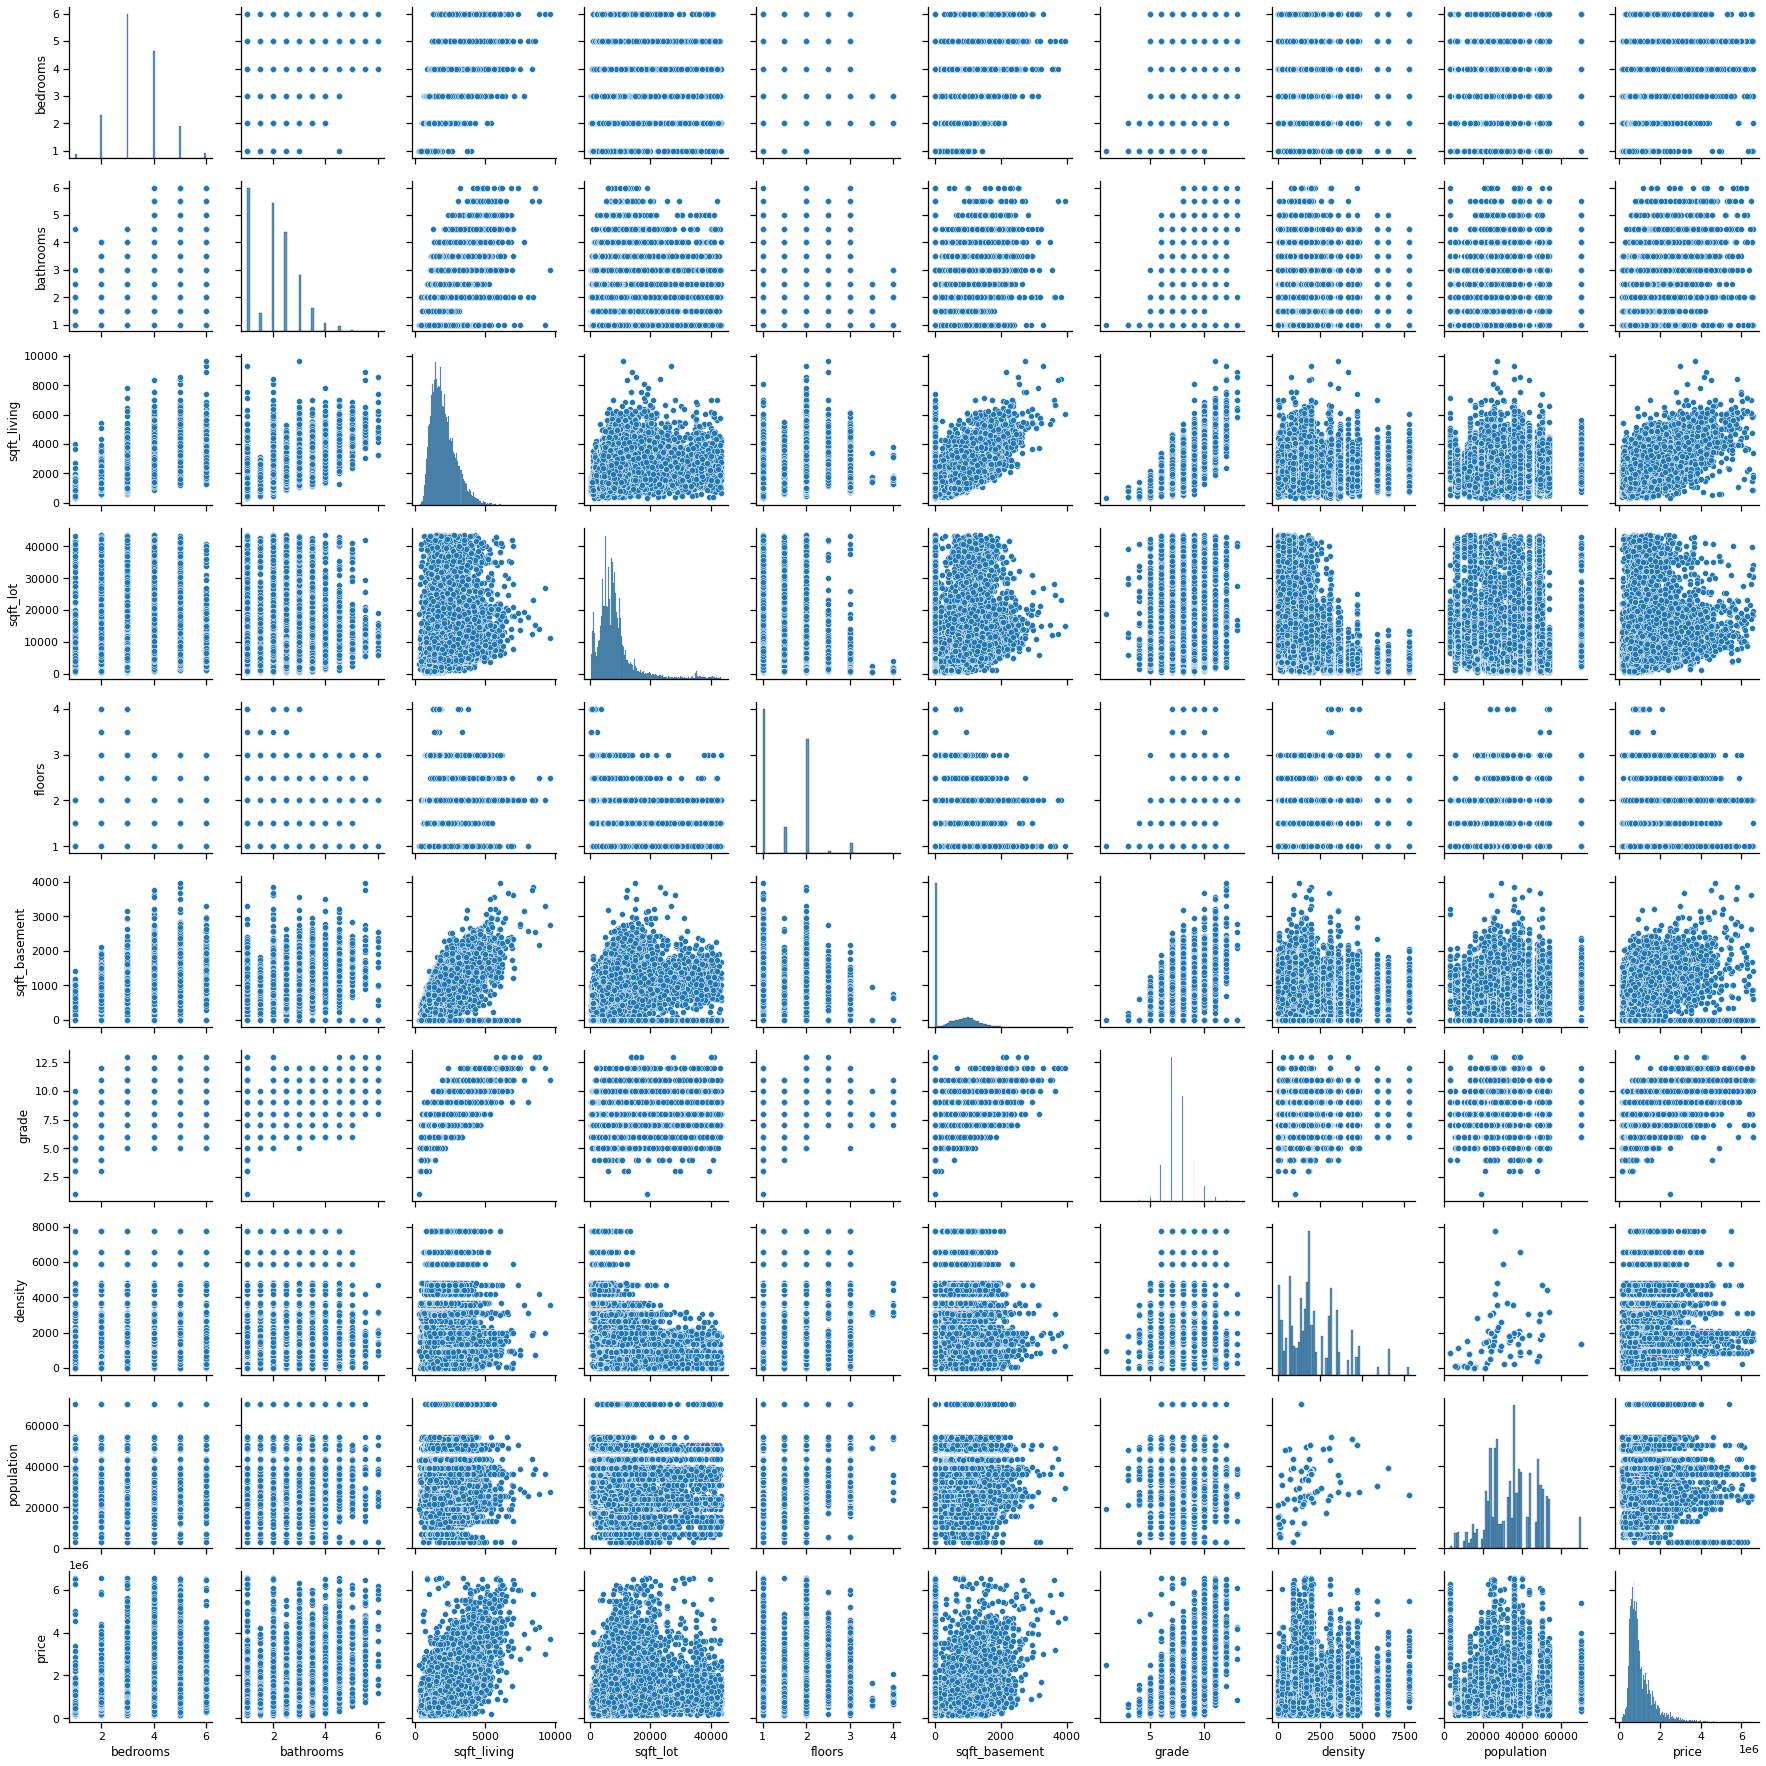

In [16]:
# Visualizing numerical data with a pairplot
nums = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_basement', 'grade', 'density','population', 'price'
]
sns.pairplot(data=df[nums]);

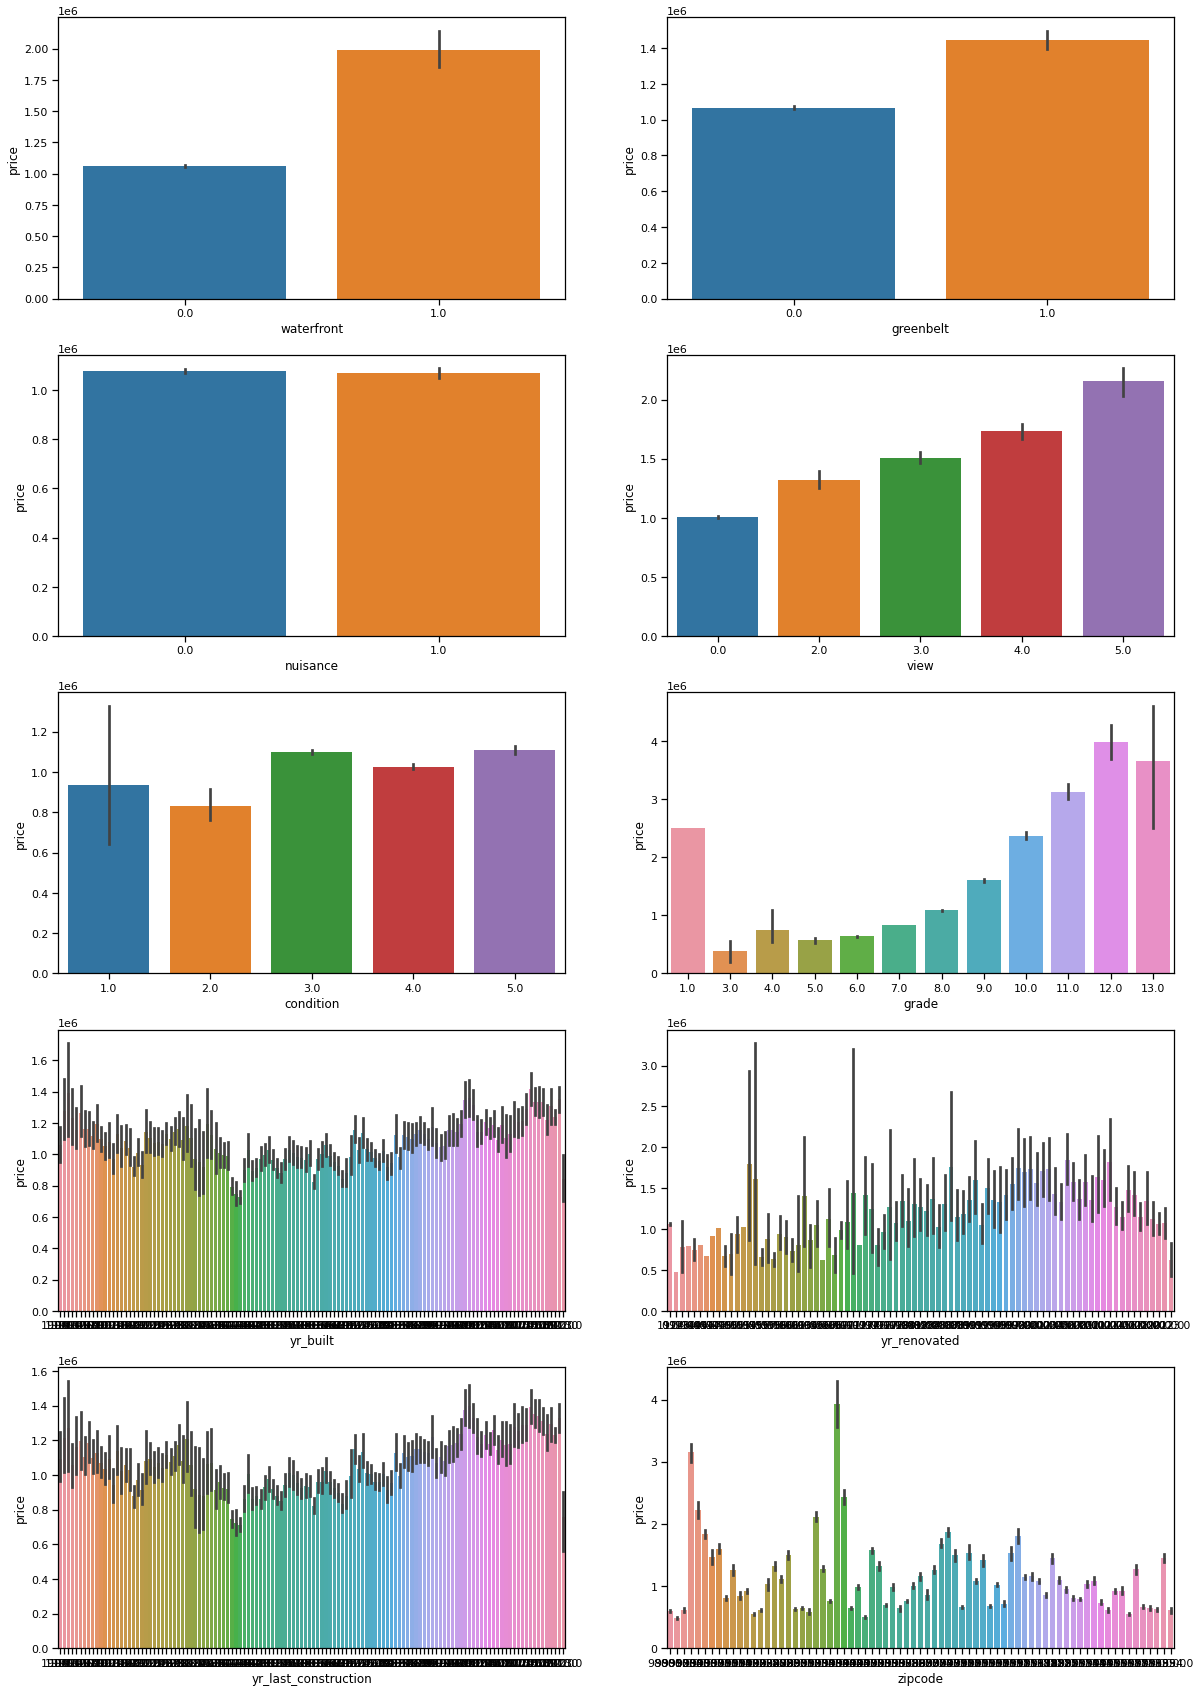

In [12]:
# Visualizing categorical data with barcharts
cats = [
    'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
    'yr_built', 'yr_renovated', 'yr_last_construction', 'zipcode'
]

fig,ax=plt.subplots(5,2,figsize=[20,30])
for i,j in enumerate(cats):
    col = i%2
    row = i//2
    axis = ax[row][col]
    sns.barplot(data=df, y='price', x=j, ax=axis)

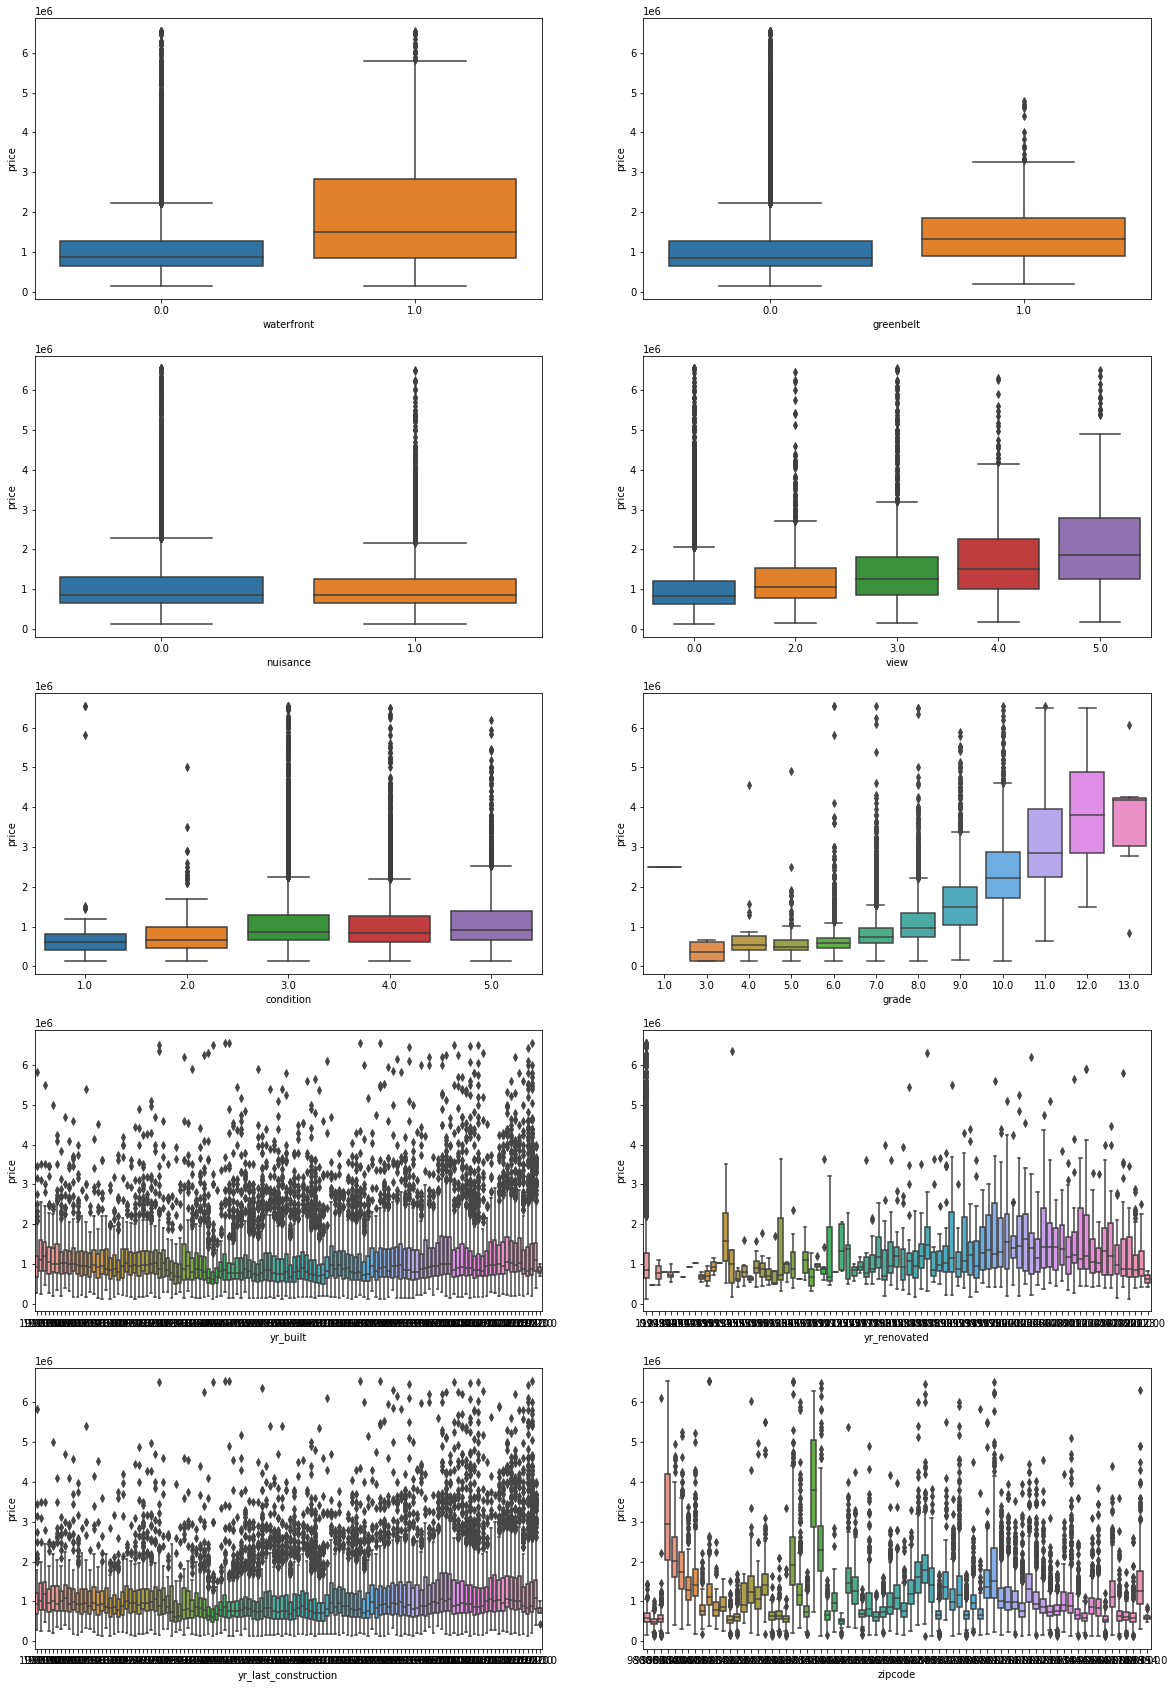

In [6]:
# Visualizing categorical data with box plots.
fig,ax=plt.subplots(5,2,figsize=[20,30])
for i,j in enumerate(cats):
    col = i%2
    row = i//2
    axis = ax[row][col]
    sns.boxplot(data=df, y='price', x=j, ax=axis)

# Correlations

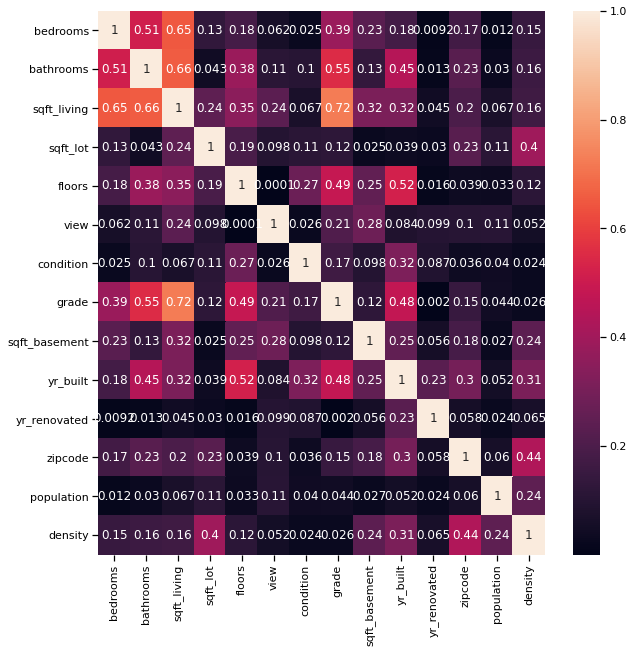

In [81]:
# Making a heatmap to visualize correlations between variables.
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df[nums].corr().abs(),annot=True,ax=ax);

In [35]:
# Sorting the numerical variables by their correlation to price.  
nums =[
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
    'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
    'zipcode', 'population', 'density'
]

# Setting a significance threshold at 0.2 to be considered as a feature for modeling.
price_corr = df[nums+['price']].corr()['price'].sort_values(ascending=False)
price_corr = price_corr[price_corr.between(.2,.99)]
price_corr

sqft_living      0.660635
grade            0.625292
bathrooms        0.433439
bedrooms         0.343864
view             0.291979
sqft_basement    0.240682
floors           0.234034
Name: price, dtype: float64

In [78]:
# Looking for multicollinearity by sorting pair-wise correlations between numerical variables.  
num_df = df[[
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
    'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
    'zipcode', 'population', 'density'
]]

corr_df = num_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.reset_index(inplace = True) 
corr_df.drop(columns=['index','level_1', 'level_0'], inplace = True)
corr_df.rename(columns={0:'corr'},inplace=True)
corr_df = corr_df[corr_df['corr']!=1]
corr_df.drop_duplicates(subset=['corr'],inplace=True)
corr_df.set_index(keys='pairs', inplace = True)
corr_df[corr_df['corr']>.5]


,corr
pairs,
"(sqft_living, grade)",0.724070
"(bathrooms, sqft_living)",0.659692
"(sqft_living, bedrooms)",0.651358
"(grade, bathrooms)",0.551723
"(floors, yr_built)",0.523135
"(bedrooms, bathrooms)",0.513853
